In [ ]:
# centernet, coco, plantdoc, epoch 48
# !python tools/train.py configs/centernet/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc.py
!bash tools/dist_train.sh configs/centernet/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc.py 2
!featurize instance release $UUID

/environment/miniconda3/lib/python3.7/site-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
/home/featurize/work/.local/lib/python3.7/site-packages/mmengine/utils/dl_utils/setup_env.py:57: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being over

In [2]:
# test
!python tools/test.py configs/centernet/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc.py \
work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/best_coco_bbox_mAP_epoch_47.pth

07/06 19:48:41 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 743383204
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,co

plot curve of work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/20250706_180123/vis_data/20250706_180123.json, metric is loss
save curve to: work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/centernet_loss.jpg


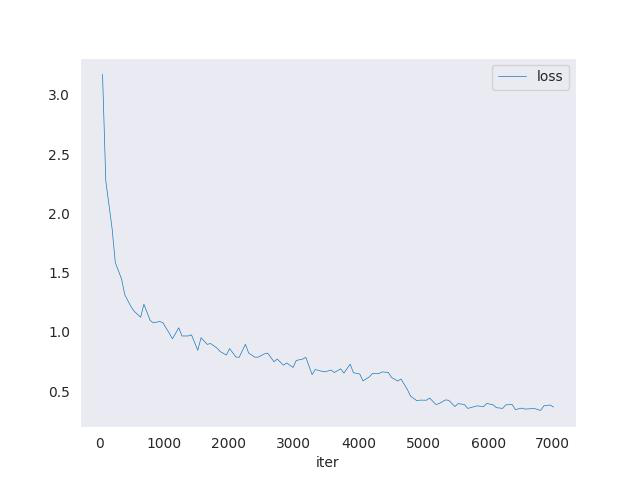

In [2]:
# figure, loss
!python tools/analysis_tools/analyze_logs.py plot_curve work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/20250706_180123/vis_data/20250706_180123.json --keys loss --out work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/centernet_loss.jpg --legend loss
# -out mAP.pdf --legend mAP
from PIL import Image
img=Image.open('work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/centernet_loss.jpg')
img.show()

In [3]:
# 计算参数量和FLOPS
!python tools/analysis_tools/get_flops.py configs/centernet/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc.py

07/07 16:05:04 - mmengine - WARNING - Some config files, such as configs/yolact and configs/detectors,may have compatibility issues with torch.jit when torch<1.12. If you want to calculate flops for these models, please make sure your pytorch version is >=1.12.
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/environment/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:2359: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  _verify_batch_size([input.size(0) * input.size(1) // num_groups, num_groups] + list(input.size()[2:]))
07/07 16:05:23 - mmengine - WARNING - Unsupported operator aten::max_pool2d encountered 1 tim

In [1]:
# 计算FPS
!python -m torch.distributed.launch --nproc_per_node=1 --master_port=29500  \
        tools/analysis_tools/benchmark.py \
        configs/centernet/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc.py \
        --checkpoint work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/best_coco_bbox_mAP_epoch_47.pth \
        --launcher pytorch --max-iter 237 --log-interval 237 --repeat-num 10

/environment/miniconda3/lib/python3.7/site-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
/home/featurize/work/.local/lib/python3.7/site-packages/mmengine/utils/dl_utils/setup_env.py:27: UserWarning: Multi-processing start method `fork` is different from the previous setting `spawn`.It will be force set to `fork`. You can change this behavior by changing `mp_start_method` in your config.
  f'Multi-processing start method `{mp_start_method}` is '
/home/featurize/work/.local/lib/python3.7/site-packages/mmengine/utils/dl_utils/setup_env.py:47: UserWarning: Setting OMP_NUM_THREADS environment variable fo

In [1]:
# test
!python tools/test.py configs/centernet/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc.py \
work_dirs/centernet-update_r50-caffe_fpn_ms-1x_coco-plantdoc/best_coco_bbox_mAP_epoch_47.pth \
--show-dir centernet

07/19 16:18:26 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 127961832
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code